<a href="https://colab.research.google.com/github/lovelyroz/ipynb/blob/main/%D9%BE%DB%8C%D8%B4_%D8%A8%DB%8C%D9%86%DB%8C_%D9%82%DB%8C%D9%85%D8%AA_%D8%B3%D9%87%D8%A7%D9%85_%D9%86%D9%85%D8%A7%D8%AF_%D8%A8%D9%88%D8%B9%D9%84%DB%8C_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import joblib

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Read Dataset
Data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/csv/vbooali.csv')

# Checking The Imported Dataset
Data.describe()

,open,high,low,adjClose,value,volume,count,yesterday,close
count,750.000000,750.000000,750.0000,750.00000,7.500000e+02,7.500000e+02,750.000000,750.000000,750.000000
mean,5735.084000,5848.658667,5594.0800,5736.24800,5.733087e+10,8.382341e+06,1013.485333,5715.348000,5720.466667
std,3894.273979,3955.881247,3775.1745,3881.31582,8.927987e+10,7.693107e+06,1168.648298,3821.270341,3883.850525
min,1988.000000,2080.000000,1985.0000,2042.00000,1.944159e+08,3.416800e+04,12.000000,2042.000000,2012.000000
25%,3699.250000,3787.750000,3620.5000,3721.25000,9.891199e+09,2.729477e+06,326.250000,3721.250000,3688.500000
50%,4215.000000,4300.000000,4118.0000,4212.50000,2.496192e+10,5.885531e+06,578.000000,4211.000000,4211.000000
75%,6072.500000,6125.000000,5905.0000,6025.00000,6.218192e+10,1.198530e+07,1125.250000,6025.000000,5987.500000
max,26290.000000,26490.000000,24760.0000,26320.00000,9.097647e+11,6.794270e+07,9513.000000,25230.000000,26490.000000


In [4]:
# Get Info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       750 non-null    object 
 1   open       750 non-null    float64
 2   high       750 non-null    float64
 3   low        750 non-null    float64
 4   adjClose   750 non-null    float64
 5   value      750 non-null    int64  
 6   volume     750 non-null    int64  
 7   count      750 non-null    int64  
 8   yesterday  750 non-null    float64
 9   close      750 non-null    float64
 10  Symbol     750 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 64.6+ KB


In [3]:
# Create DataFrame From Data
df = pd.DataFrame(Data)
df.head(2)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,Symbol
0,2020-03-24,4990.0,4990.0,4581.0,4774.0,32765787656,6887751,1252,4808.0,4856.0,vbooali
1,2020-03-25,4877.0,5012.0,4823.0,4906.0,31402907893,6290655,951,4774.0,5012.0,vbooali


In [4]:

# Remove %h-%m-%s From Date Column
df['date'] = pd.to_datetime(df['date'])
# Run this part if needed
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df.head(2)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,Symbol
0,2020-03-24,4990.0,4990.0,4581.0,4774.0,32765787656,6887751,1252,4808.0,4856.0,vbooali
1,2020-03-25,4877.0,5012.0,4823.0,4906.0,31402907893,6290655,951,4774.0,5012.0,vbooali


In [5]:
# Remove 'symbol' Column From Dataset
df.drop(columns= 'Symbol', axis=1,inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       750 non-null    object 
 1   open       750 non-null    float64
 2   high       750 non-null    float64
 3   low        750 non-null    float64
 4   adjClose   750 non-null    float64
 5   value      750 non-null    int64  
 6   volume     750 non-null    int64  
 7   count      750 non-null    int64  
 8   yesterday  750 non-null    float64
 9   close      750 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 58.7+ KB


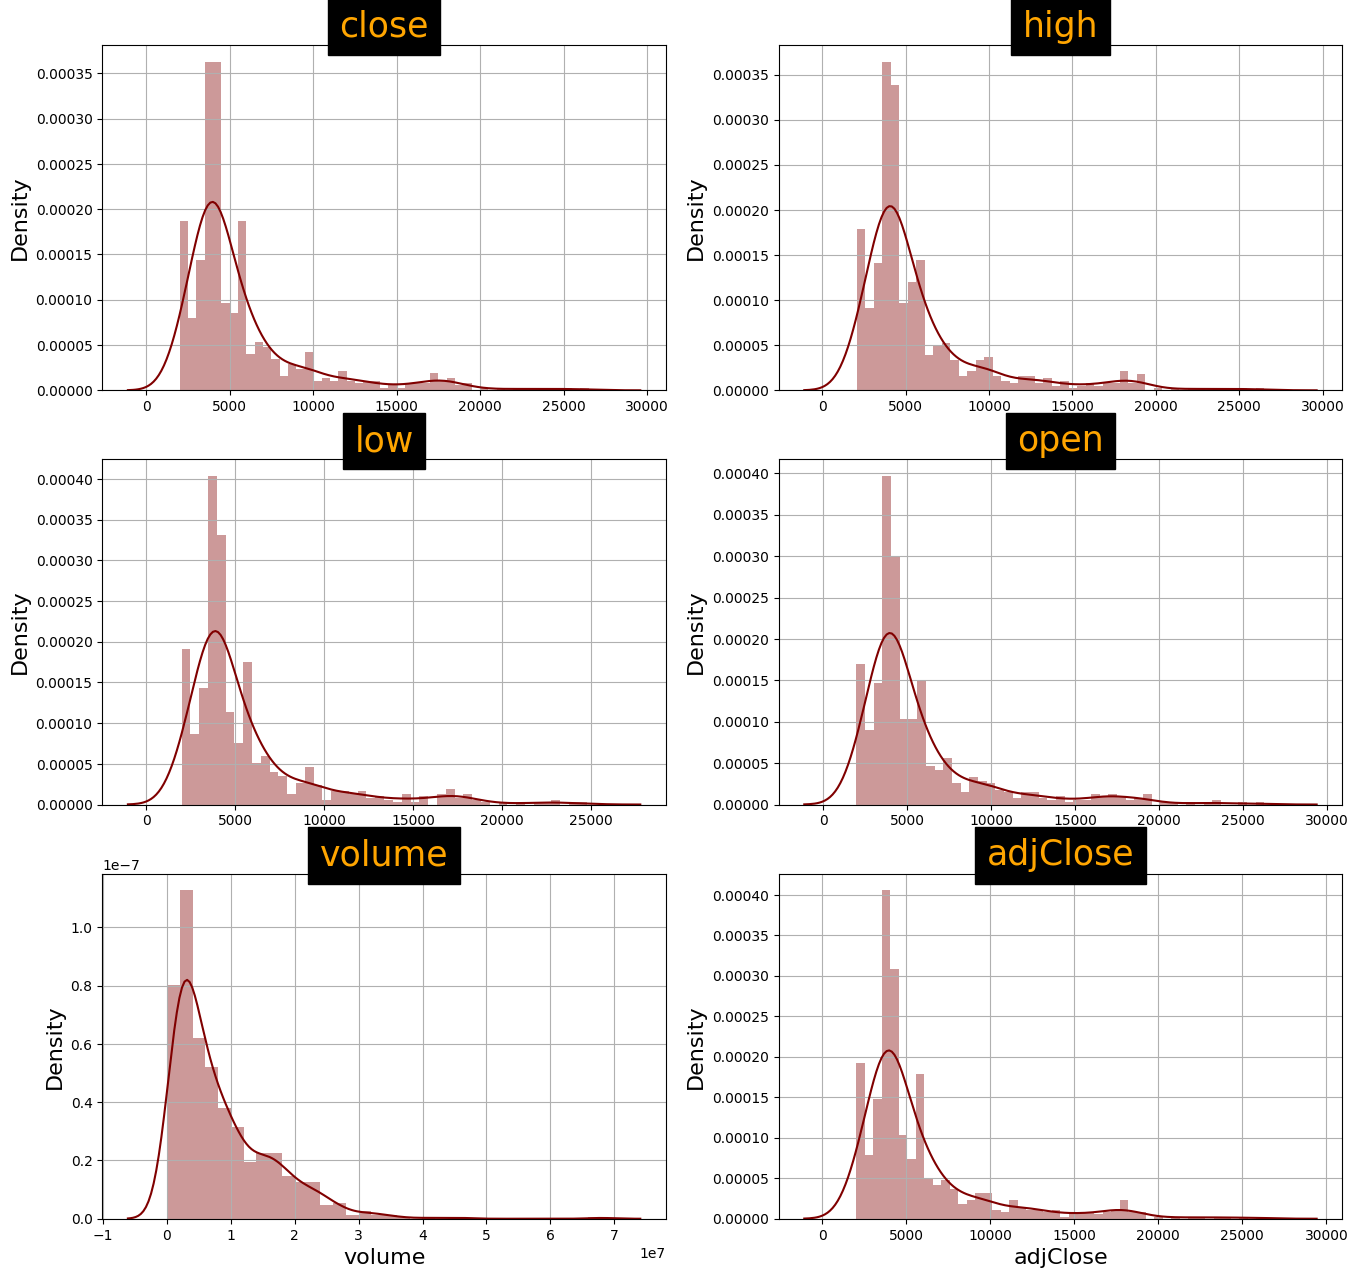

In [11]:
# Checking distribution

features = ['close', 'high', 'low', 'open', 'volume', 'adjClose']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2, idx + 1)
    sns.distplot(df, x=df[column], color='#800000')
    plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.grid()

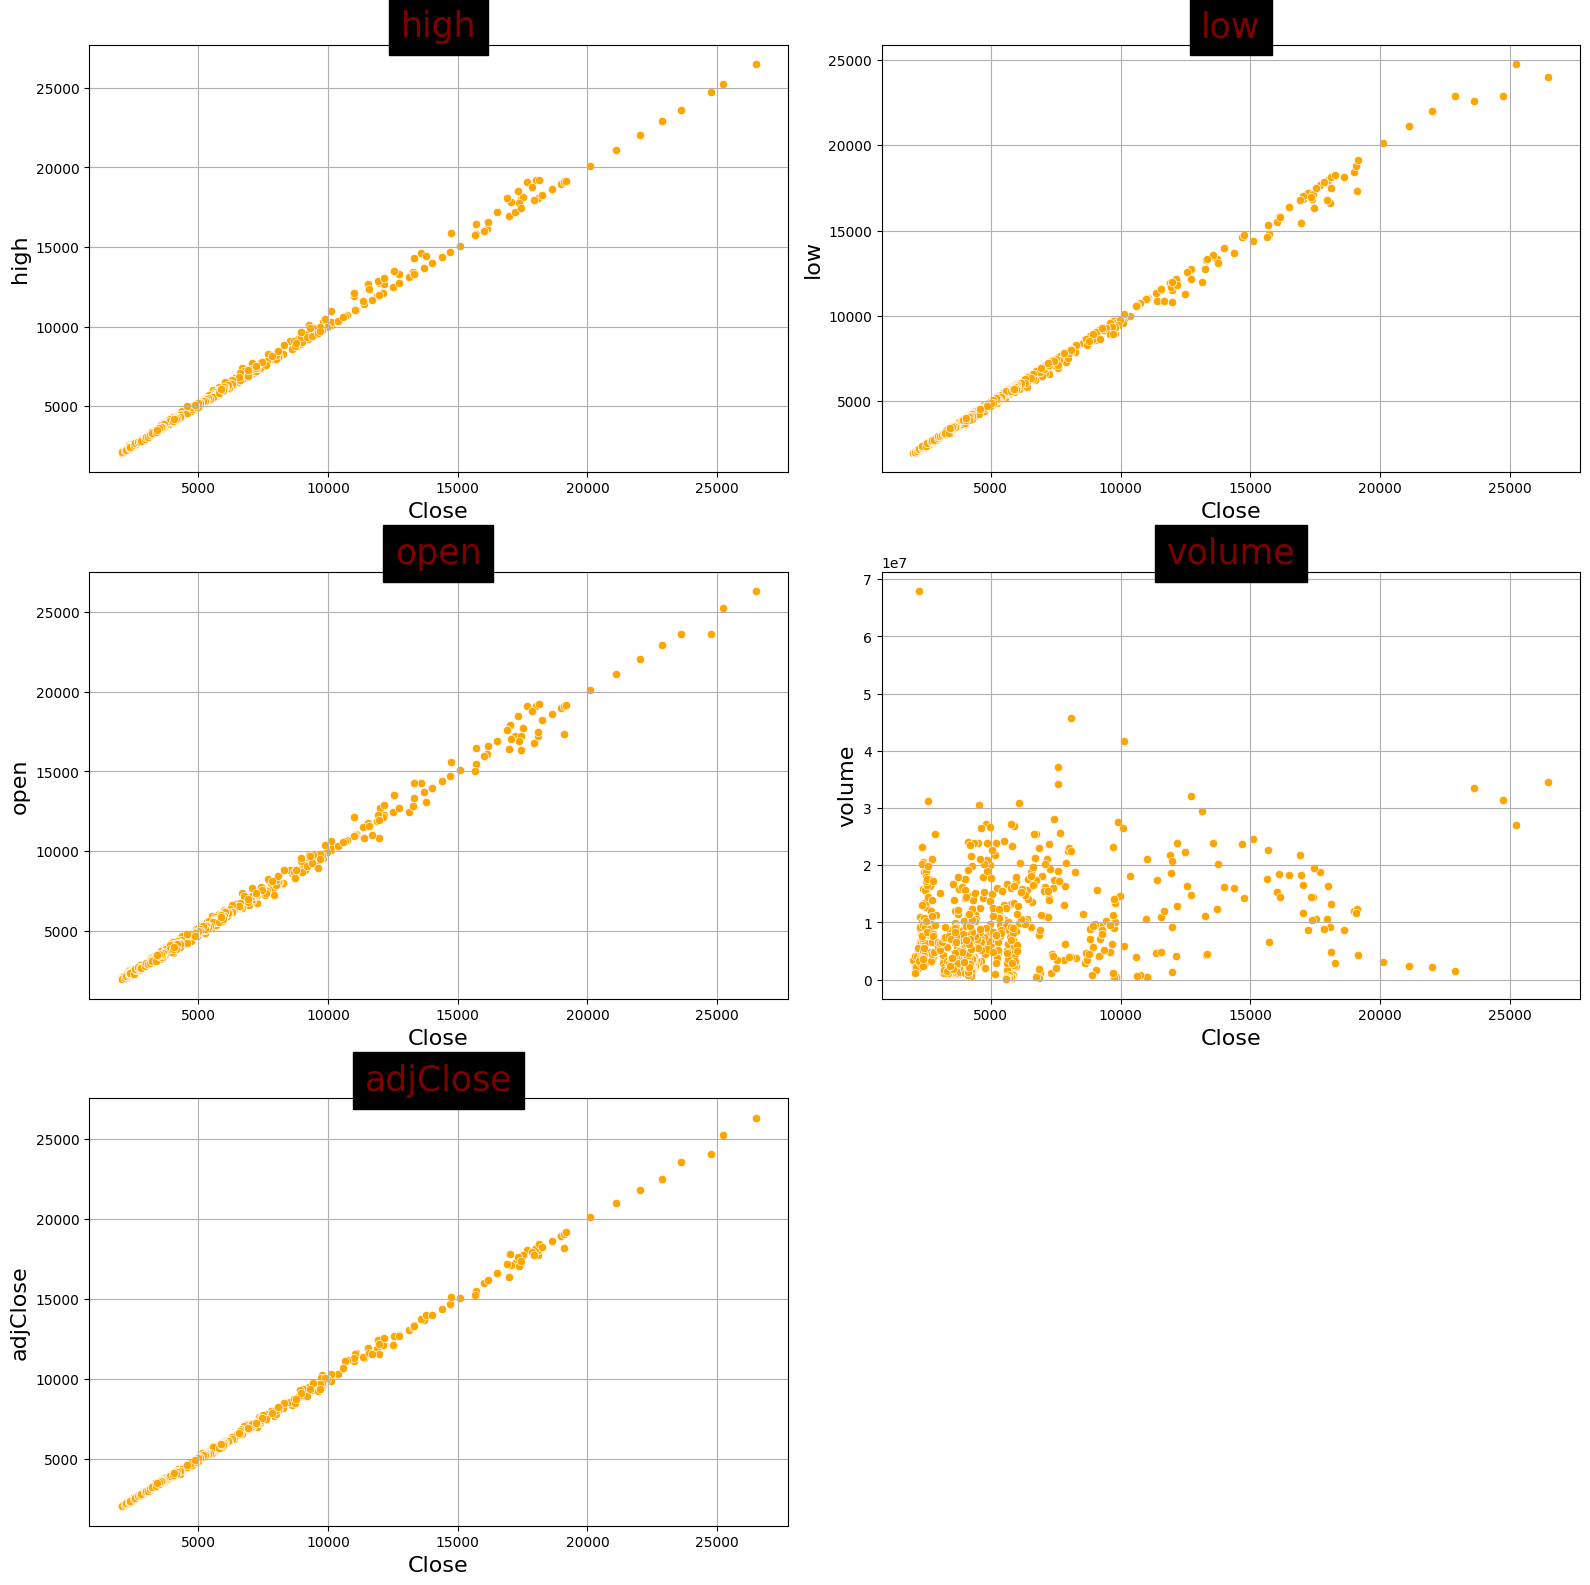

In [12]:
# checking The Behavior Of Features In Relation To 'adjcloce'
features = ['high', 'low', 'open', 'volume', 'adjClose']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2,  idx + 1)
    sns.scatterplot(x =df['close'], y=df[column] , data = df, color='orange')
    plt.title(column, backgroundcolor='black', color='#800000', fontsize=25)
    plt.xlabel('Close', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

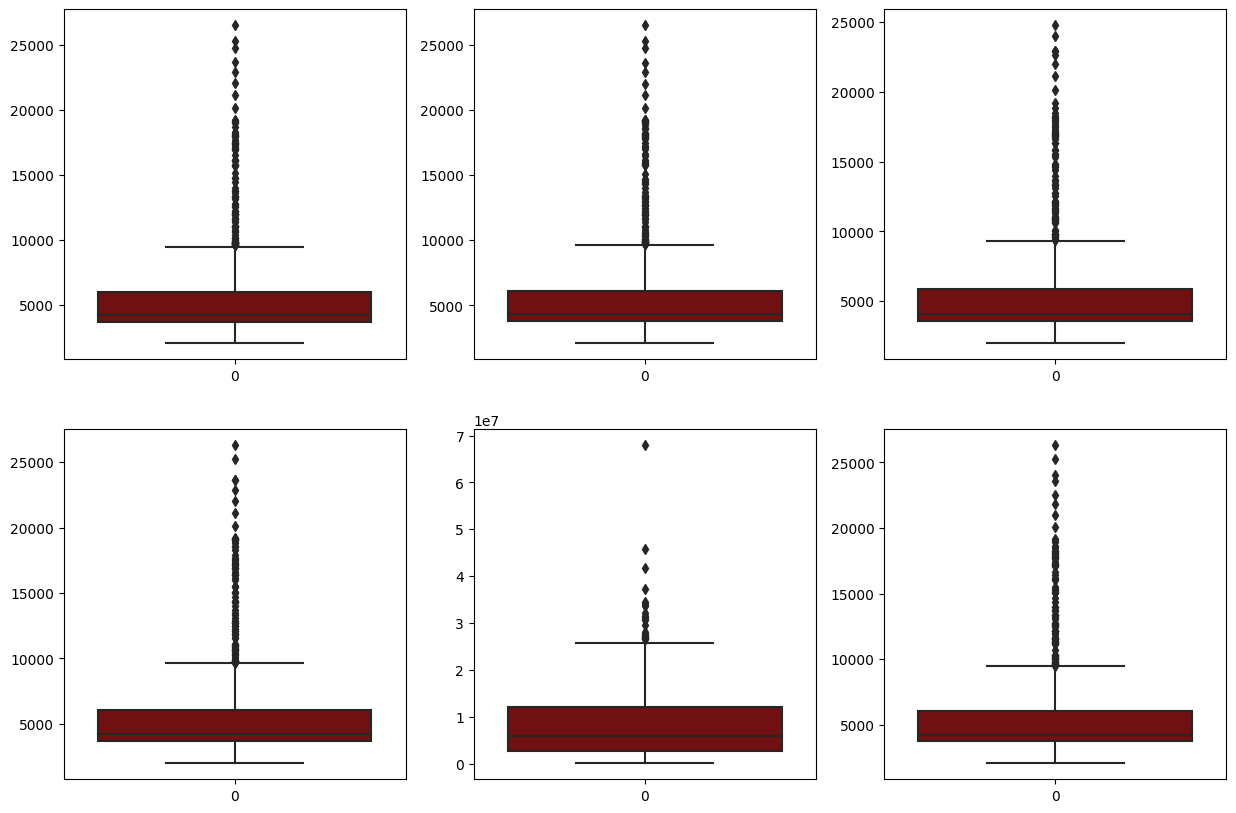

In [14]:
# Subplot
features = ['close', 'high', 'low', 'open', 'volume', 'adjClose']
fig  = plt.subplots(nrows = 2, ncols = 3,figsize = (15,10))
for i in range(len(features)) :
    plt.subplot(2,3,i+1)
    ax = sns.boxplot(df[features[i]], color="#800000")

plt.show()

In [6]:
# Creat new Dataset For plot
df1 = df.drop(['date', 'value', 'yesterday','count'], axis=1)
df1.head(2)

,open,high,low,adjClose,volume,close
0,4990.0,4990.0,4581.0,4774.0,6887751,4856.0
1,4877.0,5012.0,4823.0,4906.0,6290655,5012.0


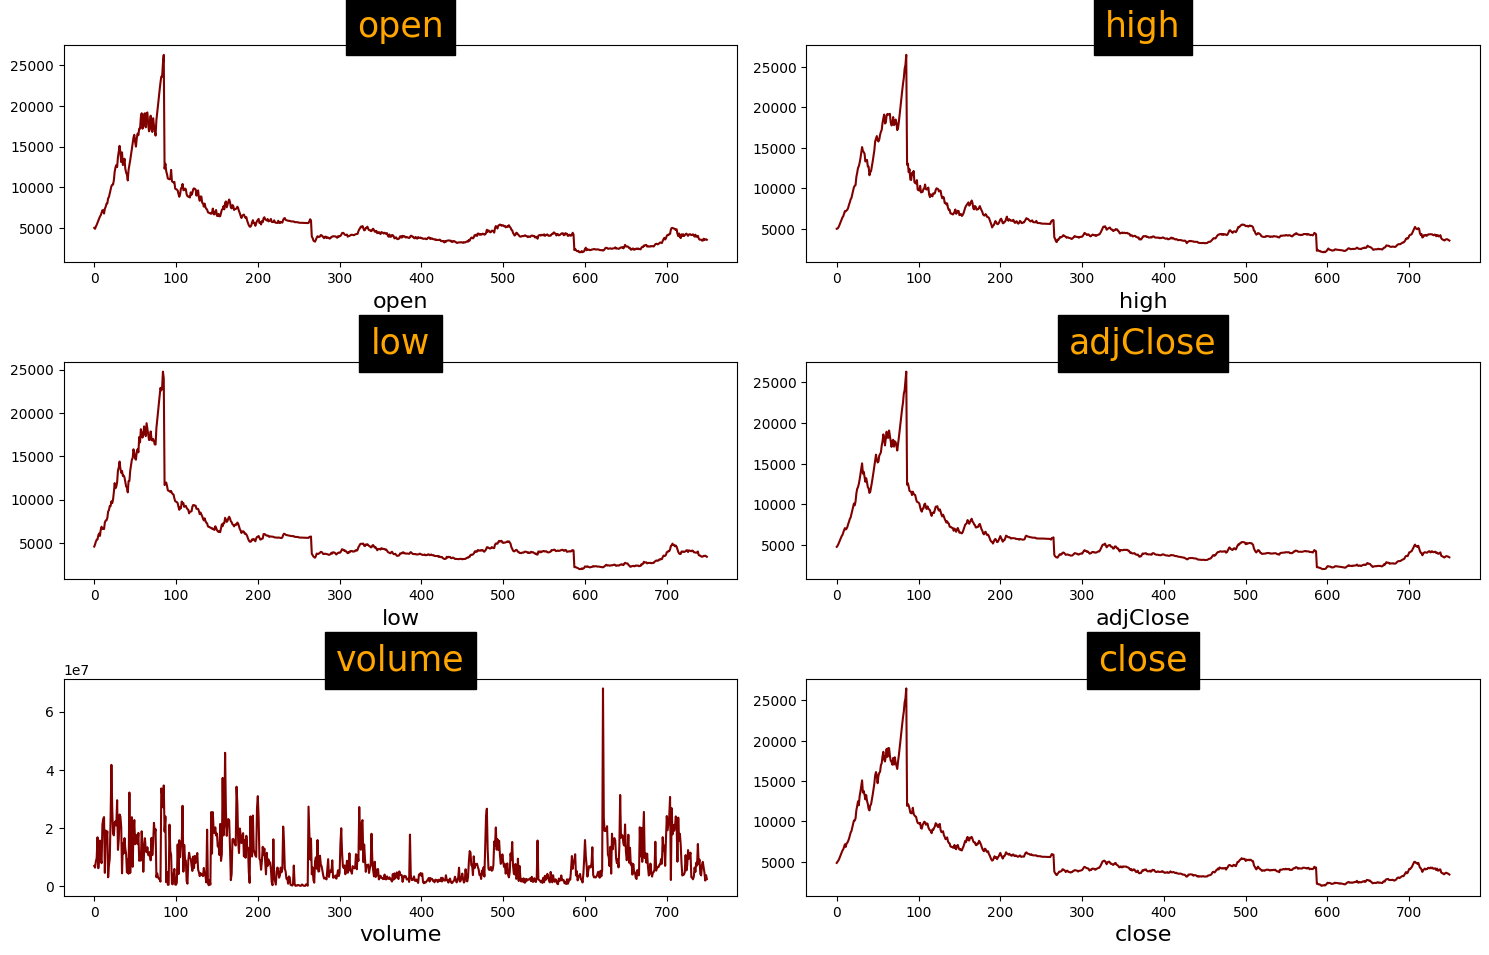

In [17]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(df1):
    plt.subplot(8, 2, idx + 1)
    plt.plot(df1.index.values,df1[i], color='#800000')
    plt.title(i,backgroundcolor='black',color='orange',fontsize=25)
    plt.xlabel(i, size = 16)
plt.tight_layout()
plt.show()

In [7]:
plt.style.use("fivethirtyeight")

df1= df.copy()

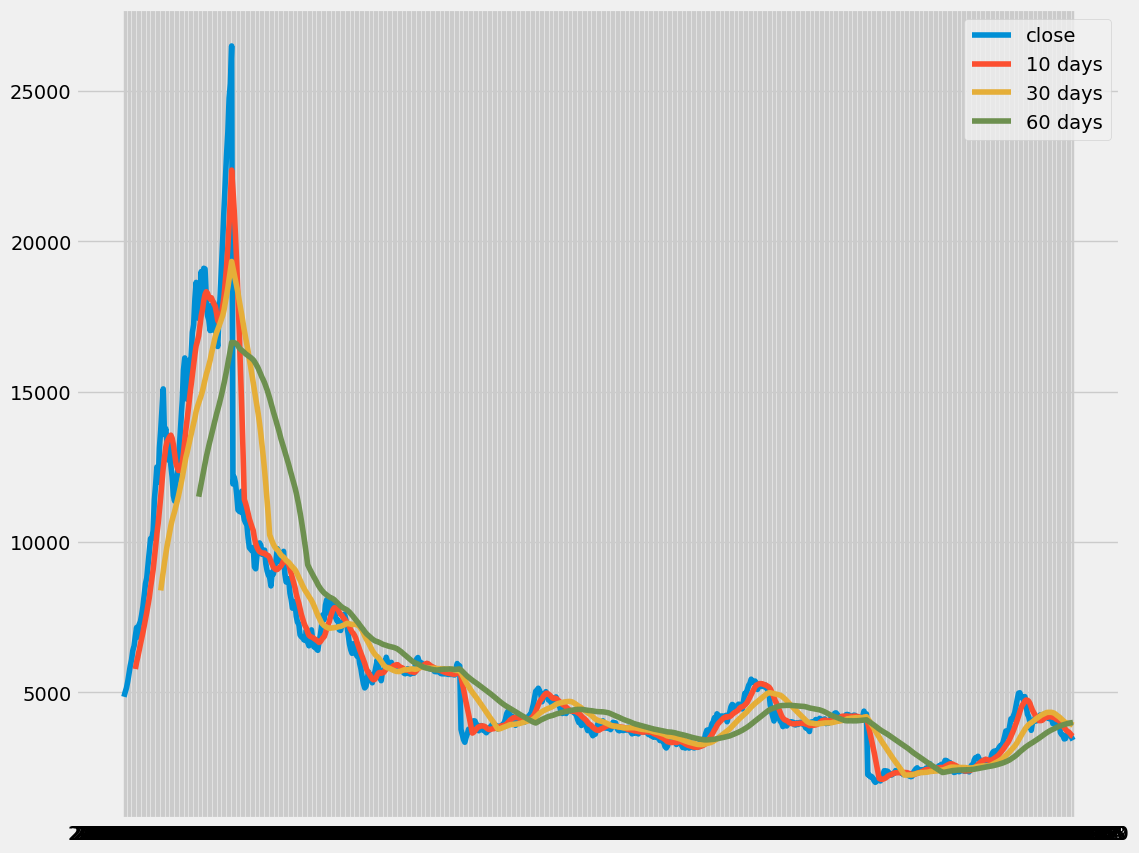

In [8]:
ma_days = [5, 10, 20, 30, 60]

for MA in ma_days:
    column_name = f"MA in {MA} days"
    df1[column_name] = df1['close'].rolling(MA).mean()

plt.figure(figsize=(12,10))

plt.plot(df1['date'],df1['close'],label='close')
# plt.plot(df1['date'],df1['MA in 5 days'],label= '5 days')
plt.plot(df1['date'],df1['MA in 10 days'],label= '10 days')
# plt.plot(df1['date'],df1['MA in 20 days'],label= '20 days')
plt.plot(df1['date'],df1['MA in 30 days'],label= '30 days')
plt.plot(df1['date'],df1['MA in 60 days'],label= '60 days')
plt.legend()
plt.show()

## Normalizing

In [9]:
# Copy from df1
df2= df1.copy()

# Normalize Data For Create Train and Test with new dataframe with only the 'Close' column
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit scaler on only one column('close')
scaled = scaler.fit_transform(df2.filter(['close']))
# now have a scaled dataframe with 'close column'
df3=pd.DataFrame(scaled, columns=['close'])

# Get describe horizontally with '.T'
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
close,750.0,0.151502,0.158667,0.0,0.06849,0.089836,0.162411,1.0


## Examining the divisions of Test and Train

In [10]:
# Finding a Length of %80 from the number of rows to Create a train Dataset (using array)
new_dataset_length = int(np.ceil( len(df2.filter(['close']).values) * .8 ))
print('Length of %80 of Dataset is ',new_dataset_length, ' Therefore, the test data length is ',len(df.close) - new_dataset_length)

Length of %80 of Dataset is  600  Therefore, the test data length is  150


## Creating Train and Test from the column of 'close'

In [11]:
# Create the training data set with 20 time steps
# finding the best time step from MA that 20 was the most optimal

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.11618596, 0.12255903, 0.1282376 , 0.13689844, 0.1471934 ,
       0.15830542, 0.16651687, 0.17893619, 0.1851867 , 0.19854563,
       0.2103113 , 0.19719748, 0.21427404, 0.21835934, 0.22763298,
       0.23886755, 0.25496364, 0.26983414, 0.2774328 , 0.29540812])]
[0.3142822125990685]

[array([0.11618596, 0.12255903, 0.1282376 , 0.13689844, 0.1471934 ,
       0.15830542, 0.16651687, 0.17893619, 0.1851867 , 0.19854563,
       0.2103113 , 0.19719748, 0.21427404, 0.21835934, 0.22763298,
       0.23886755, 0.25496364, 0.26983414, 0.2774328 , 0.29540812]), array([0.12255903, 0.1282376 , 0.13689844, 0.1471934 , 0.15830542,
       0.16651687, 0.17893619, 0.1851867 , 0.19854563, 0.2103113 ,
       0.19719748, 0.21427404, 0.21835934, 0.22763298, 0.23886755,
       0.25496364, 0.26983414, 0.2774328 , 0.29540812, 0.31428221])]
[0.3142822125990685, 0.3310319470544979]



In [12]:
# Converting the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Creating the test dataset
test = scaled[new_dataset_length-time_step:, :]

# Creating DataSets of y_test
y_test =  np.array(scaler.inverse_transform(df3))[new_dataset_length:, :]

# Creating DataSets of X_test
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])

# Converting dataset to a numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)

# Reshaping the data for learning in RNN model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

## Create Models of RNN base on LSTM, GRU, Bidirectional
### Creating Model by LSTM

In [13]:
# Creat RNN
RNN1 = tf.keras.models.Sequential()

# The First LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))

# The Second LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=65, return_sequences=False))

# The Connection
RNN1.add(tf.keras.layers.Dense(units=30))

# The Output layer
RNN1.add(tf.keras.layers.Dense(units=1))

# Compiling The RNN
RNN1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Fitting Model on The Train and Validation Dataset
Model_1 = RNN1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
19/19 [==============================] - 7s 118ms/step - loss: 0.0146 - accuracy: 0.0034 - val_loss: 10297064.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 1s 58ms/step - loss: 0.0037 - accuracy: 0.0034 - val_loss: 10296989.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 2s 89ms/step - loss: 0.0034 - accuracy: 0.0034 - val_loss: 10297076.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 2s 88ms/step - loss: 0.0029 - accuracy: 0.0034 - val_loss: 10297108.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 2s 96ms/step - loss: 0.0033 - accuracy: 0.0034 - val_loss: 10297077.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 1s 50ms/step - loss: 0.0026 - accuracy: 0.0034 - val_loss: 10297189.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 1s 53ms/step - loss: 0.0033 - accur

In [14]:
# Get The Models Predicted Price Values
predictions1 = RNN1.predict(X_test)
# Converting scaled number to actual number
predictions1 = scaler.inverse_transform(predictions1)

5/5 [==============================] - 2s 30ms/step


In [15]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions1))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions1)}')

Mean Absolute Error: 252.819228515625
Mean Squared Error: 92451.45694666705
Root Mean Squared Error: 304.0583117539579
R2_Score: 0.8566857888928895


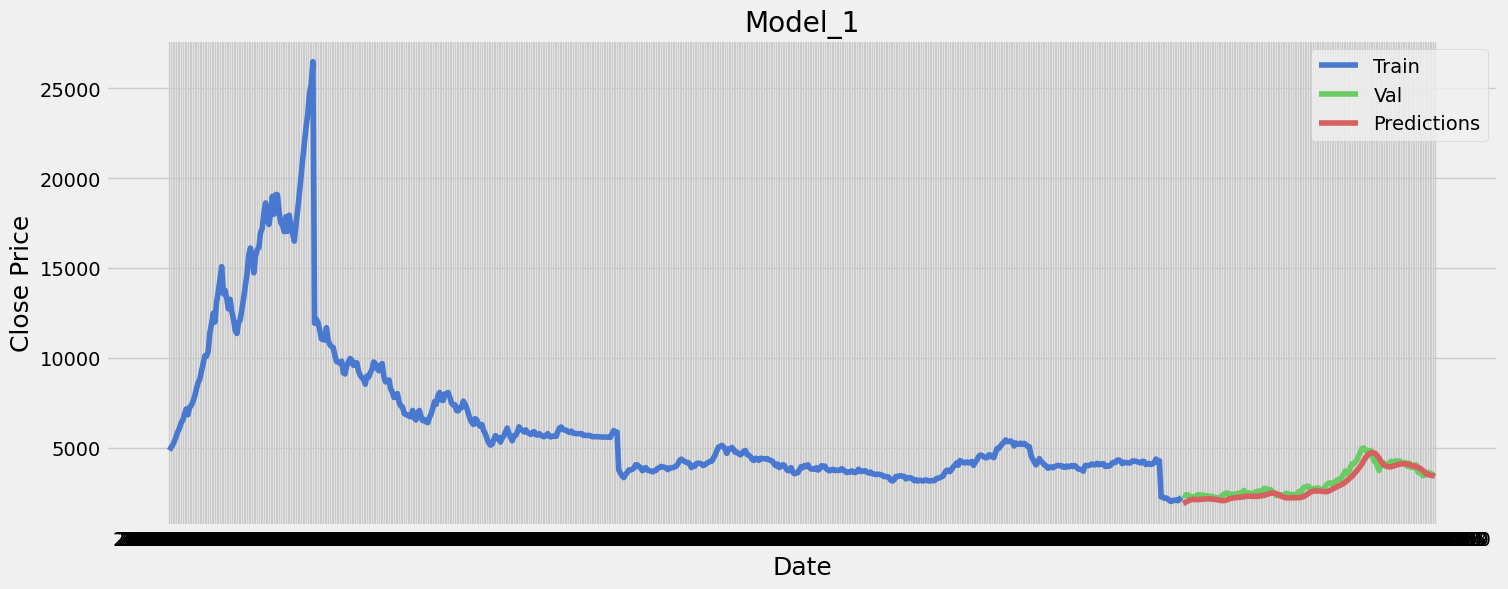

In [17]:
# Change of style
plt.style.use("seaborn-v0_8-muted")

# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions1'] = predictions1

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_1')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:600],train['close'])  # Note : 600 is the Length of %80 of Dataset
plt.plot(df1['date'].iloc[600:],valid[['close', 'Predictions1']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

##Creating Model by GRU

In [18]:
# Creat RNN
RNN2 = tf.keras.models.Sequential()

# The First GRU Layer
RNN2.add(tf.keras.layers.GRU(units=130, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))

# The Second GRU Layer
RNN2.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))

# The Connection
RNN2.add(tf.keras.layers.Dense(units=30))

# The Output layer
RNN2.add(tf.keras.layers.Dense(units=1))

# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Fitting Model on The Train and Validation Dataset
Model_2 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
19/19 [==============================] - 8s 191ms/step - loss: 0.0084 - accuracy: 0.0034 - val_loss: 10297030.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 2s 89ms/step - loss: 0.0027 - accuracy: 0.0034 - val_loss: 10297083.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 2s 102ms/step - loss: 0.0021 - accuracy: 0.0034 - val_loss: 10297192.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 1s 77ms/step - loss: 0.0017 - accuracy: 0.0034 - val_loss: 10297288.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 1s 47ms/step - loss: 0.0059 - accuracy: 0.0034 - val_loss: 10297064.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 1s 45ms/step - loss: 0.0022 - accuracy: 0.0034 - val_loss: 10297230.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 1s 46ms/step - loss: 0.0015 - accu

In [19]:
# Get The Models Predicted Price Values
predictions2 = RNN2.predict(X_test)
# Converting scaled number to actual number
predictions2 = scaler.inverse_transform(predictions2)

5/5 [==============================] - 1s 12ms/step


In [20]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions2))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions2)}')

Mean Absolute Error: 255.6304443359375
Mean Squared Error: 80486.91182459633
Root Mean Squared Error: 283.7021533661603
R2_Score: 0.8752327042369511


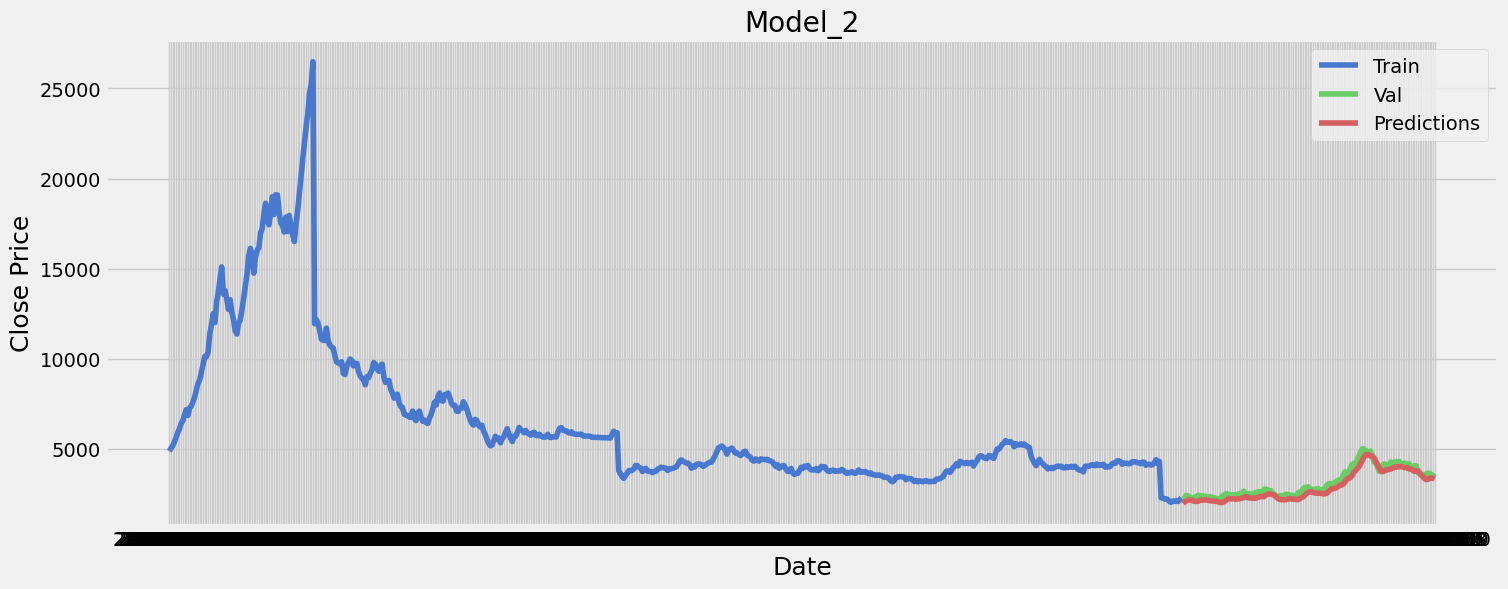

In [22]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions2'] = predictions2

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_2')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:600],train['close']) # Note : 600 is the Length of %80 of Dataset
plt.plot(df1['date'].iloc[600:],valid[['close', 'Predictions2']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

##Creating Model by LSTM & Bidirectional

In [23]:
# Creat RNN
RNN3 = tf.keras.models.Sequential()

# The First Bidirectional & LSTM  Layer
RNN3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1))))

# The Second Bidirectional & LSTM Layer
RNN3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=65, return_sequences=False)))

# The Connection
RNN3.add(tf.keras.layers.Dense(units=30))

# The Output layer
RNN3.add(tf.keras.layers.Dense(units=1))

# Compiling The RNN
RNN3.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Fitting Model on The Train and Validation Dataset
Model_3 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
19/19 [==============================] - 1s 57ms/step - loss: 0.0011 - accuracy: 0.0034 - val_loss: 10297161.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 1s 47ms/step - loss: 0.0011 - accuracy: 0.0034 - val_loss: 10297147.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 2s 83ms/step - loss: 0.0011 - accuracy: 0.0034 - val_loss: 10297158.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 2s 80ms/step - loss: 0.0012 - accuracy: 0.0034 - val_loss: 10297125.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 2s 84ms/step - loss: 0.0011 - accuracy: 0.0034 - val_loss: 10297093.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 1s 56ms/step - loss: 0.0010 - accuracy: 0.0034 - val_loss: 10297069.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 1s 52ms/step - loss: 9.7357e-04 - ac

In [24]:
# Get The Models Predicted Price Values
predictions3 = RNN3.predict(X_test)

# Converting scaled number to actual number
predictions3 = scaler.inverse_transform(predictions3)

5/5 [==============================] - 5s 29ms/step


In [25]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions3)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions3)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions3))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions3)}')

Mean Absolute Error: 1307.2303881835937
Mean Squared Error: 2624741.0832952885
Root Mean Squared Error: 1620.1052692017543
R2_Score: -3.0687590021419124


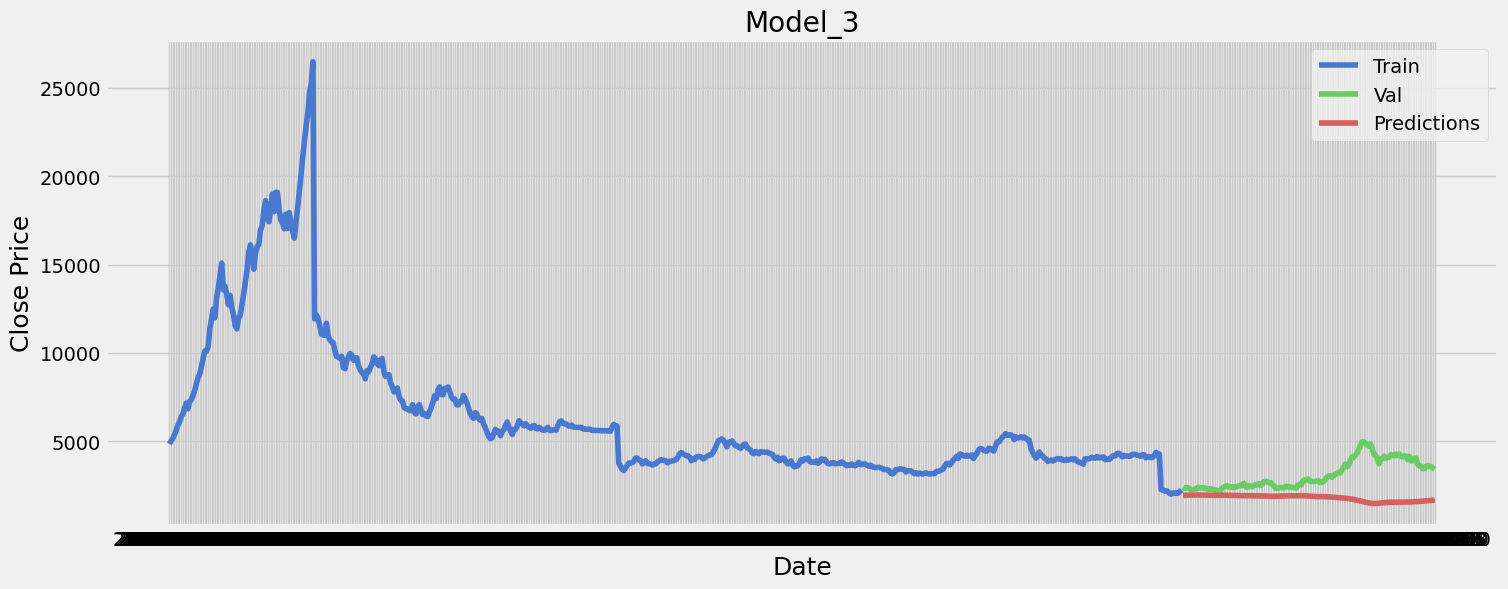

In [27]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions3'] = predictions3

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_3')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:600],train['close']) # Note : 600 is the Length of %80 of Dataset
plt.plot(df1['date'].iloc[600:],valid[['close', 'Predictions3']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

## Creating Model by LSTM & GRU

In [28]:
# Creat RNN
RNN4 = tf.keras.models.Sequential()

# The First Layer of LSTM
RNN4.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))

# The Second Layer of GRU
RNN4.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))

# The Connection
RNN4.add(tf.keras.layers.Dense(units=30))

# The Output layer
RNN4.add(tf.keras.layers.Dense(units=1))

# Compiling The RNN
RNN4.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Fitting Model on The Train and Validation Dataset
Model_4 = RNN4.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
19/19 [==============================] - 7s 155ms/step - loss: 0.0112 - accuracy: 0.0034 - val_loss: 10297015.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 2s 96ms/step - loss: 0.0041 - accuracy: 0.0034 - val_loss: 10296950.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 1s 64ms/step - loss: 0.0044 - accuracy: 0.0034 - val_loss: 10296881.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 1s 55ms/step - loss: 0.0022 - accuracy: 0.0034 - val_loss: 10297124.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 1s 56ms/step - loss: 0.0020 - accuracy: 0.0034 - val_loss: 10297015.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 1s 60ms/step - loss: 0.0019 - accuracy: 0.0034 - val_loss: 10297038.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 1s 56ms/step - loss: 0.0019 - accur

In [29]:
# Get The Models Predicted Price Values
predictions4 = RNN4.predict(X_test)
# Converting scaled number to actual number
predictions4 = scaler.inverse_transform(predictions4)

5/5 [==============================] - 1s 16ms/step


In [31]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions4)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions4)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions4))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions4)}')

Mean Absolute Error: 254.2142529296875
Mean Squared Error: 94256.58181335092
Root Mean Squared Error: 307.0123479818864
R2_Score: 0.853887563156243


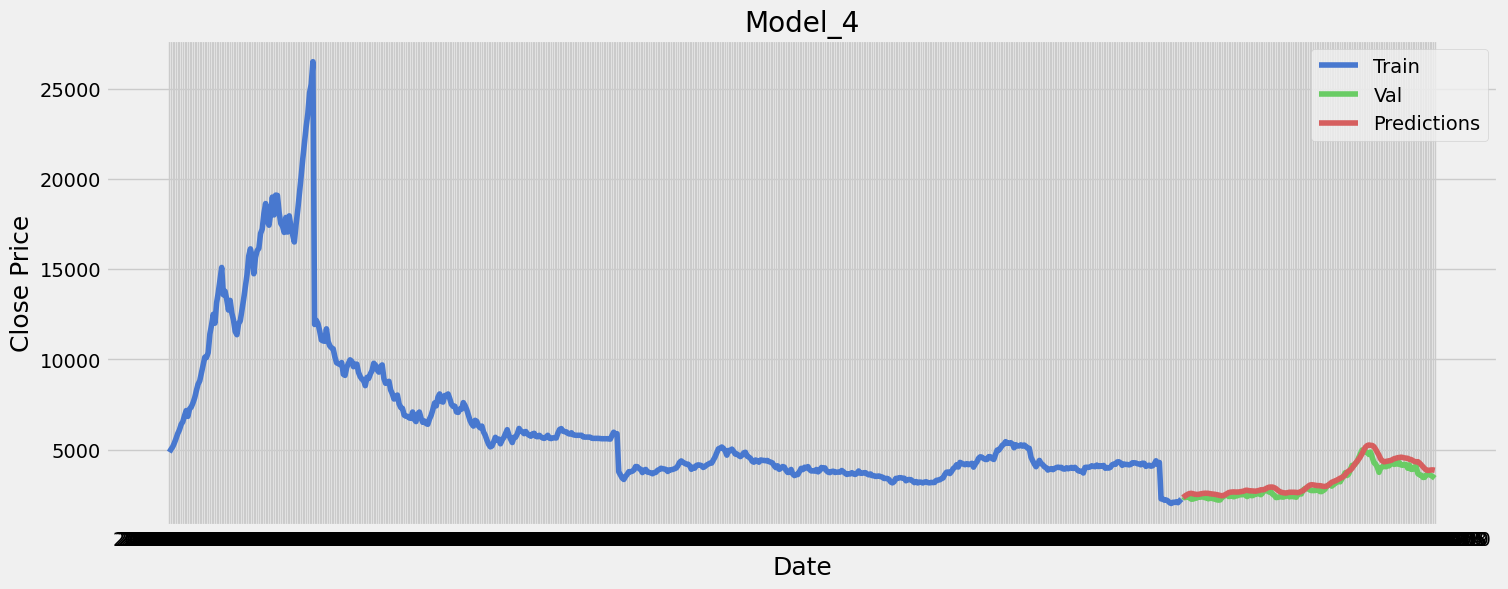

In [33]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions4'] = predictions4

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:600],train['close']) # Note : 600 is the Length of %80 of Dataset
plt.plot(df1['date'].iloc[600:],valid[['close', 'Predictions4']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

In [ ]:
# Save all of Models for WebApp or other predictions
joblib.dump(Model_1, 'model1')
joblib.dump(Model_2, 'model2') # The best model
joblib.dump(Model_4, 'model4')